In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
import nltk
from google.colab import drive
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:
# Download the data set
drive.mount('/content/drive', force_remount=True)
file_path = '/content/drive/My Drive/GoIt/Magister/Numeric_Programming/archive/combined_data.csv'


Mounted at /content/drive


In [12]:
df = pd.read_csv(file_path)
print("Dataset's form:", df.shape)
df.head()

Dataset's form: (83448, 2)


,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


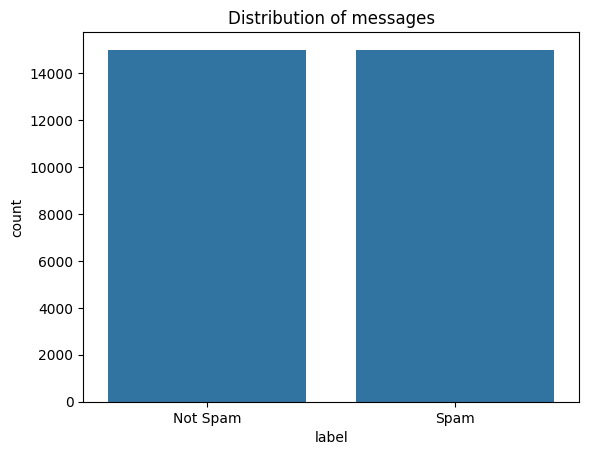

In [13]:
# Visualized. Limit the sample size 15 000 spam and 15 000 non_spam
df['label'] = df['label'].astype(int)
spam_df = df[df['label'] == 1].sample(15000, random_state=42)
non_spam_df = df[df['label'] == 0].sample(15000, random_state=42)
df = pd.concat([spam_df, non_spam_df]).sample(frac=1).reset_index(drop=True)

#Visualize
sns.countplot(data=df, x='label')
plt.xticks([0,1], ['Not Spam', 'Spam'])
plt.title('Distribution of messages')
plt.show()

In [14]:
# Word processing
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

corpus = []
for document in df["text"]:
  document = re.sub('[^a-zA-Z]', ' ', document).lower()
  document = document.split()
  document = [lemmatizer.lemmatize(word) for word in document if word not in stop_words]
  document = list(set(document)) # delete the repeats
  document = ' '.join(document)
  corpus.append(document)

df['text'] = corpus

In [15]:
# Preparation to training

X = df['text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)


In [16]:
# Naive Bayes

model = MultinomialNB()
model.fit(X_train_counts, y_train)
y_pred = model.predict(X_test_counts)

In [17]:
# Analise of results
print("Classification report")
print(classification_report(y_test, y_pred, target_names=['Not Spam', 'Spam']))

Classification report
              precision    recall  f1-score   support

    Not Spam       0.93      0.99      0.96      2981
        Spam       0.99      0.93      0.96      3019

    accuracy                           0.96      6000
   macro avg       0.96      0.96      0.96      6000
weighted avg       0.96      0.96      0.96      6000



In [18]:
# Output of the most characteristic words for Spam
words = vectorizer.get_feature_names_out()
log_probs = model.feature_log_prob_[1] # For Spam's class
top_spam_indices = np.argsort(log_probs)[-20:]
top_spam_words = words[top_spam_indices]

print('\n TOP20 words, the most characteriscic for spam:')
for word in reversed(top_spam_words):
  print(word)


 TOP20 words, the most characteriscic for spam:
escapenumber
http
com
price
one
time
day
get
escapelong
new
see
please
like
offer
may
product
best
www
need
would
